In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

## DATA

Empezaremos por considerar, para el periodo que transcurre de Abril 2019 (desde que existen registros de Enhanced Commerce) hasta Enero 2021 las siguientes variables:
 - 'ga:productSKU'
 - 'ga:pagePath'
 - 'ga:dateHourMinute'
 - 'ga:pageDepth'
 - 'ga:sessionCount'
 - 'ga:daysSinceLastSession'
 - 'ga:sourceMedium'
 - 'ga:productListViews'
 - 'ga:productListClicks'
 - 'ga:productDetailViews'
 - 'ga:productAddsToCart'

In [2]:
!ls ../data/

df_pDepth_Scount_daysSLS_srceMed_2019.csv
df_pDepth_Scount_daysSLS_srceMed_2020.csv
df_pDepth_Scount_daysSLS_srceMed_apr19.csv
df_pDepth_Scount_daysSLS_srceMed_apr20.csv
df_pDepth_Scount_daysSLS_srceMed_aug19.csv
df_pDepth_Scount_daysSLS_srceMed_aug20.csv
df_pDepth_Scount_daysSLS_srceMed_dec19.csv
df_pDepth_Scount_daysSLS_srceMed_dec20.csv
df_pDepth_Scount_daysSLS_srceMed_feb20.csv
df_pDepth_Scount_daysSLS_srceMed_jan20.csv
df_pDepth_Scount_daysSLS_srceMed_jan21.csv
df_pDepth_Scount_daysSLS_srceMed_jul19.csv
df_pDepth_Scount_daysSLS_srceMed_jul20.csv
df_pDepth_Scount_daysSLS_srceMed_jun19.csv
df_pDepth_Scount_daysSLS_srceMed_jun20.csv
df_pDepth_Scount_daysSLS_srceMed_mar20.csv
df_pDepth_Scount_daysSLS_srceMed_may19.csv
df_pDepth_Scount_daysSLS_srceMed_may20.csv
df_pDepth_Scount_daysSLS_srceMed_nov19.csv
df_pDepth_Scount_daysSLS_srceMed_nov20.csv
df_pDepth_Scount_daysSLS_srceMed_oct19.csv
df_pDepth_Scount_daysSLS_srceMed_oct20.csv
df_pDepth_Scount_daysSLS_srceMed_sep19.csv
df_pDepth_Sco

In [3]:
df_pDepth_Scount_daysSLS_srceMed_2019=pd.read_csv('../data/df_pDepth_Scount_daysSLS_srceMed_2019.csv')
print(df_pDepth_Scount_daysSLS_srceMed_2019.shape)
df_pDepth_Scount_daysSLS_srceMed_2020=pd.read_csv('../data/df_pDepth_Scount_daysSLS_srceMed_2020.csv')
print(df_pDepth_Scount_daysSLS_srceMed_2020.shape)
df_pDepth_Scount_daysSLS_srceMed_jan21=pd.read_csv('../data/df_pDepth_Scount_daysSLS_srceMed_jan21.csv')
print(df_pDepth_Scount_daysSLS_srceMed_jan21.shape)

(103489, 13)


/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(2885547, 13)
(983598, 12)


/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
print(df_pDepth_Scount_daysSLS_srceMed_2019.columns)
print("")
print(df_pDepth_Scount_daysSLS_srceMed_2020.columns)
print("")
print(df_pDepth_Scount_daysSLS_srceMed_jan21.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ga:productSKU', 'ga:pagePath',
       'ga:dateHourMinute', 'ga:pageDepth', 'ga:sessionCount',
       'ga:daysSinceLastSession', 'ga:sourceMedium', 'ga:productListViews',
       'ga:productListClicks', 'ga:productDetailViews',
       'ga:productAddsToCart'],
      dtype='object')

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ga:productSKU', 'ga:pagePath',
       'ga:dateHourMinute', 'ga:pageDepth', 'ga:sessionCount',
       'ga:daysSinceLastSession', 'ga:sourceMedium', 'ga:productListViews',
       'ga:productListClicks', 'ga:productDetailViews',
       'ga:productAddsToCart'],
      dtype='object')

Index(['Unnamed: 0', 'ga:productSKU', 'ga:pagePath', 'ga:dateHourMinute',
       'ga:pageDepth', 'ga:sessionCount', 'ga:daysSinceLastSession',
       'ga:sourceMedium', 'ga:productListViews', 'ga:productListClicks',
       'ga:productDetailViews', 'ga:productAddsToCart'],
      dtype='object')


In [5]:
df_pDepth_Scount_daysSLS_srceMed_2020.head(3)

,Unnamed: 0,Unnamed: 0.1,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart
0,0,0,1000,/parafarmacia/es/1000-heliocare-360-pediatrics...,202001141125,12,407,0,google / organic,0,1,1,0
1,1,1,1000,/parafarmacia/es/1000-heliocare-360-pediatrics...,202001141345,5,3,0,(direct) / (none),0,0,1,0
2,2,2,1001,/parafarmacia/es/1001-heliocare-caps-60-caps.html,202001080932,6,3,19,google / organic,0,1,1,0


In [6]:
df_pDepth_Scount_daysSLS_srceMed_2019.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)
print(df_pDepth_Scount_daysSLS_srceMed_2019.shape)
df_pDepth_Scount_daysSLS_srceMed_2020.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)
print(df_pDepth_Scount_daysSLS_srceMed_2020.shape)
df_pDepth_Scount_daysSLS_srceMed_jan21.drop('Unnamed: 0', axis=1, inplace=True)
print(df_pDepth_Scount_daysSLS_srceMed_jan21.shape)

(103489, 11)
(2885547, 11)
(983598, 11)


In [7]:
dfs=[df_pDepth_Scount_daysSLS_srceMed_2019,df_pDepth_Scount_daysSLS_srceMed_2020,df_pDepth_Scount_daysSLS_srceMed_jan21]
df = pd.concat(dfs).reset_index()
df.shape

(3972634, 12)

In [8]:
df.head(3)

,index,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart
0,0,1008,/parafarmacia/es/,201904301452,1,1,0,(direct) / (none),1,0,0,0
1,1,1008,/parafarmacia/es/,201904301524,3,1,0,(direct) / (none),1,0,0,0
2,2,1008,/parafarmacia/es/,201904301545,7,33,0,merchants.google.com / referral,1,0,0,0


In [9]:
df.drop('index', axis=1, inplace=True)

In [10]:
df.head(3)

,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart
0,1008,/parafarmacia/es/,201904301452,1,1,0,(direct) / (none),1,0,0,0
1,1008,/parafarmacia/es/,201904301524,3,1,0,(direct) / (none),1,0,0,0
2,1008,/parafarmacia/es/,201904301545,7,33,0,merchants.google.com / referral,1,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972634 entries, 0 to 3972633
Data columns (total 11 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   ga:productSKU            object
 1   ga:pagePath              object
 2   ga:dateHourMinute        object
 3   ga:pageDepth             object
 4   ga:sessionCount          object
 5   ga:daysSinceLastSession  object
 6   ga:sourceMedium          object
 7   ga:productListViews      int64 
 8   ga:productListClicks     int64 
 9   ga:productDetailViews    int64 
 10  ga:productAddsToCart     int64 
dtypes: int64(4), object(7)
memory usage: 333.4+ MB


In [12]:
df["ga:pageDepth"]=pd.to_numeric(df["ga:pageDepth"])
df["ga:sessionCount"]=pd.to_numeric(df["ga:sessionCount"])
df["ga:daysSinceLastSession"]=pd.to_numeric(df["ga:daysSinceLastSession"])

ValueError: Unable to parse string "(other)" at position 2989036

In [13]:
df.iloc[2989036]

ga:productSKU              (other)
ga:pagePath                (other)
ga:dateHourMinute          (other)
ga:pageDepth               (other)
ga:sessionCount            (other)
ga:daysSinceLastSession    (other)
ga:sourceMedium            (other)
ga:productListViews          53386
ga:productListClicks           215
ga:productDetailViews         3050
ga:productAddsToCart           265
Name: 2989036, dtype: object

In [14]:
df.drop(df.index[2989036], inplace=True)

In [15]:
df["ga:pageDepth"]=pd.to_numeric(df["ga:pageDepth"])
df["ga:sessionCount"]=pd.to_numeric(df["ga:sessionCount"])
df["ga:daysSinceLastSession"]=pd.to_numeric(df["ga:daysSinceLastSession"])

In [16]:
df.dtypes

ga:productSKU              object
ga:pagePath                object
ga:dateHourMinute          object
ga:pageDepth                int64
ga:sessionCount             int64
ga:daysSinceLastSession     int64
ga:sourceMedium            object
ga:productListViews         int64
ga:productListClicks        int64
ga:productDetailViews       int64
ga:productAddsToCart        int64
dtype: object

## TARGET

In [17]:
print("No. observations per class")
print(df['ga:productAddsToCart'].value_counts())
print("")

print("% observations per class")
print(100*df['ga:productAddsToCart'].value_counts(normalize=True))

No. observations per class
0     3899430
1       72379
2         669
3          76
4          29
5          20
6          10
7           9
8           2
9           2
11          2
12          2
10          1
13          1
24          1
Name: ga:productAddsToCart, dtype: int64

% observations per class
0     98.157318
1      1.821940
2      0.016840
3      0.001913
4      0.000730
5      0.000503
6      0.000252
7      0.000227
8      0.000050
9      0.000050
11     0.000050
12     0.000050
10     0.000025
13     0.000025
24     0.000025
Name: ga:productAddsToCart, dtype: float64


Recordemos que cada fila recoge un(os) determinado(s) hit(s) ('ga:productListViews', 'ga:productListClicks', 'ga:productDetailViews' y 'ga:productAddsToCart') para un determinado producto, en una determinada url y a una determinada fecha y hora. El resto de dimensiones recogen características del usuario o de la sesión:
- 'ga:pageDepth' : número de pagínas vistas en la página durante la sesión hasta ese momento
- 'ga:sessionCount : numero total de sesiones a la página del 'usuario'.
- 'ga:daysSinceLastSession': días que han transcurrido desde la última sesión del 'usuario'.
- 'ga:sourceMedium': procedencia del usuario.

Como ya se vio en el Notebook "Data_Collection", algunas observaciones recogen más de un click en el botón "Añadir al carrito". 

En aquel momento, para el periodo de 7 días analizado, se concluyó que aquellas referencias correspondían mayoritariamente a un mismo usuario que había presionado varias veces sobre el botón y no a una agregación de usuarios. Veamos en este caso:

In [18]:
addsToCart_higher_one = df[df["ga:productAddsToCart"]>1]
addsToCart_higher_one.shape

(824, 11)

Sólo el 0,02% de las observaciones recogen valores superiores a 1 en la variable target "ga:productAddsToCart".

In [19]:
addsToCart_higher_one.shape[0]/df.shape[0]*100

0.020741910969374718

En principio más de la mitad proceden de Motores de Búsqueda con lo que parece poco probable que varios usuarios con las mismas caracteristicas coincidan en buscar el mismo producto y hagan click en el boton de añadir al carrito el mismo día a la misma hora:

In [20]:
addsToCart_higher_one['ga:sourceMedium'].value_counts()

google / organic                    284
google / cpc                        210
(direct) / (none)                   137
sendinblue / email                   91
instagram.com / referral             39
l.instagram.com / referral           21
m.facebook.com / referral             6
bing / organic                        6
youtube.com / referral                6
IGShopping / Social                   4
idealo.es / referral                  3
l.facebook.com / referral             2
webanalitica.es / referral            2
vfarma.loc:8080 / referral            2
Facebook tráfico / CPC                2
linktr.ee / referral                  2
secure.comnpay.com / referral         1
sis.redsys.es / referral              1
btodigital.lpages.co / referral       1
vogue.es / referral                   1
es.search.yahoo.com / referral        1
sis-t.redsys.es:25443 / referral      1
yahoo / organic                       1
Name: ga:sourceMedium, dtype: int64

In [21]:
addsToCart_higher_one.groupby(['ga:sourceMedium','ga:productAddsToCart'])[['ga:dateHourMinute']].count().sort_values(by="ga:dateHourMinute",ascending=False)

,,ga:dateHourMinute
ga:sourceMedium,ga:productAddsToCart,
google / organic,2,234
google / cpc,2,149
(direct) / (none),2,117
sendinblue / email,2,79
instagram.com / referral,2,33
google / cpc,3,29
google / organic,3,25
l.instagram.com / referral,2,21
google / cpc,4,11


De tratarse de un mismo usuario, tiene sentido que presione varias veces sobre el botón, bien para añadir más cantidad de producto, bien por un error suyo o en la url:

In [22]:
print(addsToCart_higher_one.groupby(['ga:pagePath','ga:productAddsToCart'])[['ga:dateHourMinute']].count().sort_values(by="ga:dateHourMinute",ascending=False).shape)
addsToCart_higher_one.groupby(['ga:pagePath','ga:productAddsToCart'])[['ga:dateHourMinute']].count().sort_values(by="ga:dateHourMinute",ascending=False).head(20)

(363, 1)


,,ga:dateHourMinute
ga:pagePath,ga:productAddsToCart,
/es/pedido,2,80
/parafarmacia/es/carrito?action=show,2,32
/es/vitaminas-minerales-y-suplementos/1391-unique-pink-collagen-el-mejor-colageno-para-tu-piel.html,2,29
/es/contorno-de-ojos-para-bolsas/6339-skinperfection-by-bluevert-contorno-de-ojos-15ml-arturo.html,2,24
/es/pedido,3,24
/es/top-ventas/7143-unique-green-collagen.html,2,18
/parafarmacia/es/carrito,2,15
/es/,2,15
/es/manchas/6643-gema-herrerias-gh-10-antiox-vis-comprar-oferta.html,2,9


In [23]:
print(addsToCart_higher_one.groupby(['ga:productSKU','ga:productAddsToCart'])[['ga:dateHourMinute']].count().sort_values(by="ga:dateHourMinute",ascending=False).shape)
addsToCart_higher_one.groupby(['ga:productSKU','ga:productAddsToCart'])[['ga:dateHourMinute']].count().sort_values(by="ga:dateHourMinute",ascending=False).head(20)

(407, 1)


,,ga:dateHourMinute
ga:productSKU,ga:productAddsToCart,
1391,2,58
7143,2,31
6339,2,29
4393,2,15
6285,2,11
6337,2,11
6643,2,11
7212,2,10
4599,2,10


In [24]:
print(addsToCart_higher_one['ga:productSKU'].nunique())
print(addsToCart_higher_one['ga:pagePath'].nunique())

318
291


In [25]:
print(addsToCart_higher_one.groupby(['ga:pagePath','ga:productSKU','ga:productAddsToCart'])[['ga:dateHourMinute']].count().sort_values(by="ga:dateHourMinute",ascending=False).shape)
addsToCart_higher_one.groupby(['ga:pagePath','ga:productSKU','ga:productAddsToCart'])[['ga:dateHourMinute']].count().sort_values(by="ga:dateHourMinute",ascending=False).head(20)

(527, 1)


,,,ga:dateHourMinute
ga:pagePath,ga:productSKU,ga:productAddsToCart,
/es/vitaminas-minerales-y-suplementos/1391-unique-pink-collagen-el-mejor-colageno-para-tu-piel.html,1391,2,29
/es/contorno-de-ojos-para-bolsas/6339-skinperfection-by-bluevert-contorno-de-ojos-15ml-arturo.html,6339,2,24
/es/top-ventas/7143-unique-green-collagen.html,7143,2,18
/es/pedido,1391,2,12
/es/manchas/6643-gema-herrerias-gh-10-antiox-vis-comprar-oferta.html,6643,2,9
/es/top-ventas/6285-retinol-03-gema-herrerias-serum-03-retinol-np-COMPRAR-OFERTA-MADRID.html,6285,2,8
/es/top-ventas/1306-farma-dorsch-go-organic-champu-500-ml-8470001740687.html,1306,2,8
/es/top-ventas/6337-skinperfection-bluevert-complete-day-serum-30-comprar-madrid-arturo.html,6337,2,8
/es/,1391,2,7


En general, los datos resultan bastante coherentes y parecen soportar la idea de que se añaden varias unidades al carrito. Veamos aquellos casos en los que las cantidades superan las 4 unidades:

In [26]:
addsToCart_higher_four= addsToCart_higher_one[addsToCart_higher_one['ga:productAddsToCart']>4]
print(addsToCart_higher_four.shape)
addsToCart_higher_four

(50, 11)


,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart
548846,6539,/parafarmacia/es/pedido,202004111240,27,1,0,google / organic,0,0,0,6
1713387,1373,/es/pedido,202011101627,12,1,0,(direct) / (none),0,0,0,5
1836161,4196,/es/pedido,202011221130,44,3,0,google / organic,0,0,0,5
1871878,4393,/es/pedido,202011181409,6,17,0,sendinblue / email,0,0,0,6
1941616,4893,/es/pedido,202011231859,10,1,0,google / cpc,0,0,0,5
2065454,6338,/es/serum/6338-skinperfection-by-bluevert-abso...,202011231110,23,21,0,google / organic,0,0,0,7
2078642,6339,/es/contorno-de-ojos-para-bolsas/6339-skinperf...,202011262031,5,1,0,(direct) / (none),0,0,2,5
2134773,6593,/es/pedido,202011111523,2,2,0,(direct) / (none),0,0,0,5
2481792,7425,/es/pedido,202011231509,5,5,0,google / cpc,0,0,0,12
2542070,1177,/es/soluciones-micelares/1177-gh-solucion-mice...,202012271727,4,1,0,google / cpc,0,0,1,5


In [27]:
addsToCart_higher_four[addsToCart_higher_four['ga:sourceMedium'].str.contains('google')].shape

(37, 11)

Solo 50 observaciones cuentan con más de 4 registros 'ga:productAddsToCart', de los cuales 37 proceden de Google.

In [28]:
addsToCart_higher_four[~addsToCart_higher_four['ga:sourceMedium'].str.contains('google')]

,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart
1713387,1373,/es/pedido,202011101627,12,1,0,(direct) / (none),0,0,0,5
1871878,4393,/es/pedido,202011181409,6,17,0,sendinblue / email,0,0,0,6
2078642,6339,/es/contorno-de-ojos-para-bolsas/6339-skinperf...,202011262031,5,1,0,(direct) / (none),0,0,2,5
2134773,6593,/es/pedido,202011111523,2,2,0,(direct) / (none),0,0,0,5
3264239,4393,/es/productos-gema-herrerias/4393-cristina-mit...,202101232150,4,1,0,youtube.com / referral,0,0,0,5
3495757,6593,/es/pedido,202101081917,9,2,17,sendinblue / email,0,0,0,24
3495758,6593,/es/pedido,202101081918,9,2,17,sendinblue / email,0,0,0,9
3500886,6643,/es/manchas/6643-gema-herrerias-gh-10-antiox-v...,202101101617,5,1,0,idealo.es / referral,0,0,0,7
3816897,7423,/es/pedido,202101141638,25,1,0,(direct) / (none),0,0,0,6
3953363,7827,/es/champus/7827-my-organics-thickening-shampo...,202101232053,9,4,0,instagram.com / referral,0,0,2,6


En aquellas observaciones que no corresponden con Google vemos, bien 'ga:pageDepth' muy elevados, bien usuarios recurrentes.  En ambos casos, la posibilidad de que usuarios con esas mismas caracteristicas coincidan en la misma fecha y a la misma hora, añadiendo el mismo producto al carrito, resulta improbable. 

En cuanto a los casos de las 9, 11 y 24 supuestas unidades, corresponden a mascarillas y protectores de mascarillas, con lo que resultan razonables dichas cantidades.

Por tanto, en principio, consideraremos cada observación como un usuario único y, de cara a tratar nuestro modelo como una clasificación, consideraremos los valores superiores a 1 en "ga:productAddsToCart" como una conversión: 



In [29]:
data=df.copy()
data['ga:productAddsToCart_transf']=data["ga:productAddsToCart"].apply(lambda x: 1 if x>1 else x)

In [30]:
print("No. observations per class")
print(data['ga:productAddsToCart_transf'].value_counts())
print("")

print("% observations per class")
print(100*data['ga:productAddsToCart_transf'].value_counts(normalize=True))

No. observations per class
0    3899430
1      73203
Name: ga:productAddsToCart_transf, dtype: int64

% observations per class
0    98.157318
1     1.842682
Name: ga:productAddsToCart_transf, dtype: float64


Observamos que nuestras clases están claramente desbalanceadas. Sólo en un 1,84% de nuestras observaciones se añade un producto al carrito. 

Dado que nuestros resultados en el Baseline fueron muy razonables en este sentido, de momento, no trataremos este posible problema. 

## FEATURES

Empezaremos evaluando y analizando las variables numéricas disponibles.

### Product List Views

Esta variable recoge el número de veces que el producto apareció en una lista. 

En nuestro caso, esta columna nos da información sobre si el producto de la observación en cuestión apareció en una lista (>= 1) o no (0) y si apareció el número de veces que lo hizo en dicha lista.

En el conjunto de datos, adopta valores entre 0 y 7, aunque casi el 97% de las observaciones se encuentra entre 0 o 1:

In [34]:
print("No. observations per class")
print(data['ga:productListViews'].value_counts())
print("")

print("% observations per class")
print(100*data['ga:productListViews'].value_counts(normalize=True))

No. observations per class
1    3170919
0     673018
2     120260
3       7491
4        800
5        120
6         23
7          2
Name: ga:productListViews, dtype: int64

% observations per class
1    79.819077
0    16.941359
2     3.027211
3     0.188565
4     0.020138
5     0.003021
6     0.000579
7     0.000050
Name: ga:productListViews, dtype: float64


<AxesSubplot:xlabel='ga:productListViews', ylabel='count'>

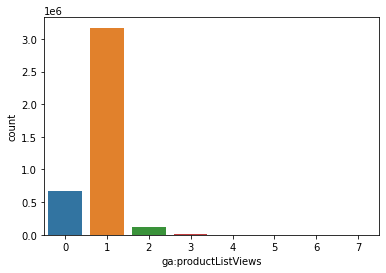

In [35]:
sns.countplot(data=data,x=data['ga:productListViews'])

Veamos cómo se relaciona con nuestra variable target:

<AxesSubplot:xlabel='ga:productAddsToCart_transf', ylabel='ga:productListViews'>

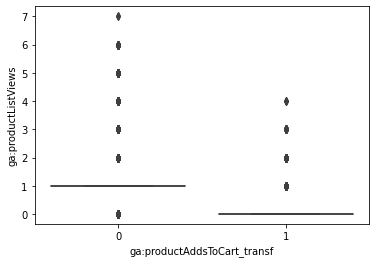

In [36]:
sns.boxplot(data=data,x=data['ga:productAddsToCart_transf'],y=data['ga:productListViews'])

<AxesSubplot:xlabel='ga:productAddsToCart_transf', ylabel='ga:productListViews'>

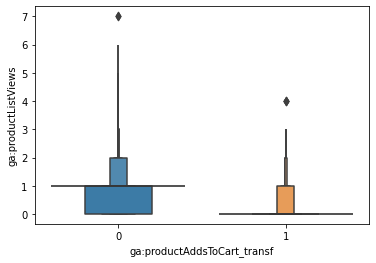

In [37]:
sns.boxenplot(data=data,x=data['ga:productAddsToCart_transf'],y=data['ga:productListViews'])

In [38]:
data.groupby(['ga:productListViews','ga:productAddsToCart_transf'])[['ga:dateHourMinute']].count().sort_values(by="ga:dateHourMinute",ascending=False).head(50)

,,ga:dateHourMinute
ga:productListViews,ga:productAddsToCart_transf,
1,0,3167305
0,0,603717
2,0,119993
0,1,69301
3,0,7473
1,1,3614
4,0,797
2,1,267
5,0,120


In [39]:
listviews_per_conversion = data.pivot_table(index='ga:productListViews',columns='ga:productAddsToCart_transf',values='ga:dateHourMinute', aggfunc='count')
listviews_per_conversion

ga:productAddsToCart_transf,0,1
ga:productListViews,,
0,603717.0,69301.0
1,3167305.0,3614.0
2,119993.0,267.0
3,7473.0,18.0
4,797.0,3.0
5,120.0,NaN
6,23.0,NaN
7,2.0,NaN


<AxesSubplot:xlabel='ga:productAddsToCart_transf', ylabel='ga:productListViews'>

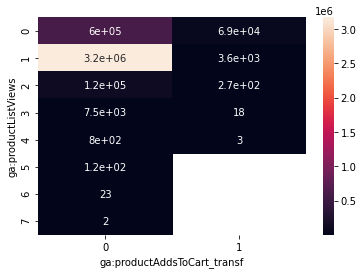

In [40]:
sns.heatmap(listviews_per_conversion,annot=True)

En términos generales, parece que cuando se añade un producto al carrito, la variable 'ga:productListViews' suele adoptar como valor 0. Esto podría indicar que en general los productos suelen añadirse en la propia página del producto ('Detail view') y no en listas.

## Desde dónde se añaden los productos al carrito?

In [41]:
data_target_1 = data[data["ga:productAddsToCart_transf"]==1]
print(data_target_1.shape)
data_target_1.head(3)

(73203, 12)


,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf
70,1175,/parafarmacia/es/carrito?action=show,201904301638,34,1,0,google / organic,0,0,0,1,1
71,1177,/parafarmacia/es/carrito?action=show,201904300949,6,11,0,(direct) / (none),0,0,0,1,1
72,1177,/parafarmacia/es/contenido/8-ayuda,201904301540,7,33,0,merchants.google.com / referral,0,0,0,1,1


In [42]:
data_target_1.groupby(['ga:productListViews','ga:productDetailViews'])[['ga:productAddsToCart_transf']].count().sort_values(by='ga:productAddsToCart_transf', ascending=False)

ga:productAddsToCart_transf
ga:productListViews ga:productDetailViews                             
0                   0                                            50429
                    1                                            16016
1                   0                                             3561
0                   2                                             2463
                    3                                              319
2                   0                                              266
0                   4                                               68
1                   1                                               45
3                   0                                               18
1                   2                                                7
0                   5                                                5
4                   0                                                3
0                   9                                                1
1                   3                                                1
2                   1                                                1

En efecto, lo productos suelen añadirse al carrito con más frecuencia desde la ficha de producto que desde páginas tipo lista. Por ejemplo, las observaciones con 0 en 'productListViews' y 1 en 'productDetailViews' suman 16.016 registros con 'addToCart' positivo frente a las observaciones con 1 en 'productListViews' y 0 en 'productDetailViews'que suman 3.561 registros.

Cabe recordar que en las fichas de producto, siempre aparece una lista de recomendación del tipo 'También podría interesarle", lo que explica que haya combinaciones con valores positivos en 'productListViews' y 'productDetailViews' simultaneamente. Quiere decir que al cliente se le está recomendando la misma referencia de producto de la observación en la lista de recomendados. 

En cambio, cuando 'productListViews' adopta valores positivos y 'productDetailViews' 0, la observación tendría lugar en una página tipo de lista exclusivamente. 

Ahora bien, existe una combinación inesperada que registra el mayor número de hits 'addToCart'(50.429 registros). El producto se añade al carrito pero no se le visualiza ni en una lista ni en una ficha de producto. Veamos con más detalle donde se están produciendo esos eventos:

In [43]:
noviews_hits = data_target_1[(data_target_1['ga:productListViews']==0) & (data_target_1['ga:productDetailViews']==0)]
print(noviews_hits.shape)
noviews_hits.head(50)

(50429, 12)


,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf
70,1175,/parafarmacia/es/carrito?action=show,201904301638,34,1,0,google / organic,0,0,0,1,1
71,1177,/parafarmacia/es/carrito?action=show,201904300949,6,11,0,(direct) / (none),0,0,0,1,1
72,1177,/parafarmacia/es/contenido/8-ayuda,201904301540,7,33,0,merchants.google.com / referral,0,0,0,1,1
74,1178,/parafarmacia/es/carrito?action=show,201904301625,34,1,0,google / organic,0,0,0,1,1
75,1178,/parafarmacia/es/carrito?action=show,201904301637,34,1,0,google / organic,0,0,0,1,1
99,1391,/parafarmacia/es/carrito?action=show,201904301047,14,3,25,google / organic,0,0,0,1,1
102,1443,/parafarmacia/es/carrito?action=show,201904301248,7,30,0,merchants.google.com / referral,0,0,0,1,1
108,1472,/parafarmacia/es/carrito?action=show,201904301555,5,6,13,google / organic,0,0,0,1,1
119,2261,/parafarmacia/es/carrito?action=show,201904300955,6,11,0,(direct) / (none),0,0,0,1,1
130,4114,/parafarmacia/es/carrito?action=show,201904301912,5,1,0,google / organic,0,0,0,1,1


In [44]:
noviews_hits_pagePath = noviews_hits['ga:pagePath'].str.split('/',expand=True)
noviews_hits_pagePath.sample(50)

,0,1,2,3,4,5
244689,,parafarmacia,es,carrito?action=show,None,None
1039228,,parafarmacia,es,338_caudalie,None,None
857058,,parafarmacia,es,carrito?action=show,None,None
732147,,parafarmacia,es,carrito?action=show,None,None
1787519,,es,940-protectores-solares,None,None,None
136430,,parafarmacia,es,carrito?action=show,None,None
3093111,,es,contorno-de-ojos-para-ojera-oscura,1313-farma-dorsch-your-eyes-de-fridda-dorsch-8...,None,None
75731,,parafarmacia,es,carrito?action=show,None,None
557441,,parafarmacia,es,carrito?action=show,None,None
612,,parafarmacia,es,busqueda?controller=search&s=,None,None


En un 80% de los casos, sucede en pagePath que inicia con la página 'parafarmacia/es':

In [45]:
noviews_hits_pagePath[1].value_counts(normalize=True)

parafarmacia    0.800254
es              0.177834
medicamentos    0.021456
galileo         0.000416
pt              0.000040
Name: 1, dtype: float64

In [46]:
noviews_hits_pagePath[noviews_hits_pagePath[1]=='parafarmacia'][2].value_counts(normalize=True)

es                                                                                                                                                            0.998538
pt                                                                                                                                                            0.000942
carrito?action=show                                                                                                                                           0.000421
blog                                                                                                                                                          0.000050
busqueda?controller=search&s=collagen                                                                                                                         0.000025
index.php?fc=module&module=leoblog&rewrite=flavo-c-melatonin-ultraglican-rutina-de-isdin-antioxidante-protege-de-dia-repara-de-noche&id=25&controller=blog    0.00002

En un 66% de los casos, el path finaliza en carrito (lo que tendría sentido por tratarse de una página especial que no hace referencia a listas o fichas de producto) pero también observamos con mucha menor frecuencia otras páginas regulares que sí deberían registrar estos eventos:

In [47]:
noviews_hits_pagePath[(noviews_hits_pagePath[1]=='parafarmacia') & (noviews_hits_pagePath[2]=='es')][3].value_counts(normalize=True).head(50)

carrito?action=show                                                                            0.494776
carrito                                                                                        0.166538
                                                                                               0.076805
pedido                                                                                         0.011639
contenido                                                                                      0.009877
718-outlet                                                                                     0.004219
blog                                                                                           0.003871
iniciar-sesion?back=my-account                                                                 0.003623
292-contorno-de-los-ojos                                                                       0.003226
363_heliocare                                                   

Puede tratarse de un problema de configuración de Google Analytics en el caso de las páginas anidadas a Parafarmacia. Veamos si está recogiendo list views o detail views en el conjunto de nuestro dataset:

In [48]:
data[data['ga:pagePath'].str.startswith('/parafarmacia/')]

,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf
0,1008,/parafarmacia/es/,201904301452,1,1,0,(direct) / (none),1,0,0,0,0
1,1008,/parafarmacia/es/,201904301524,3,1,0,(direct) / (none),1,0,0,0,0
2,1008,/parafarmacia/es/,201904301545,7,33,0,merchants.google.com / referral,1,0,0,0,0
3,1008,/parafarmacia/es/,201904301704,1,1,0,(direct) / (none),1,0,0,0,0
4,1009,/parafarmacia/es/,201904301452,1,1,0,(direct) / (none),1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2513168,977,/parafarmacia/es/331_fridda-dorsch-farma-dorsch,202011011933,16,7,0,google / cpc,2,0,0,0,0
2513169,977,/parafarmacia/es/977-farma-dorsch-contorno-ojo...,202011010118,3,1,0,google / cpc,0,1,1,0,0
2513170,977,/parafarmacia/es/977-farma-dorsch-contorno-ojo...,202011011116,1,1,0,google / cpc,0,0,1,0,0
2515106,993,/parafarmacia/es/993-cepillo-dental-adulto-vit...,202011011550,163,1,0,google / organic,0,1,1,0,0


En principio, existen observaciones cuyo primer page path es parafarmacia y si que recogen ListViews y DetailViews positivos. Veamos en el conjunto de datos (con addtocart igual a 0 y 1), qué observaciones tienen ListViews y DetailViews igual a 0 simultaneamente:

In [49]:
data_noviews= data[(data['ga:productListViews']==0) & (data['ga:productDetailViews']==0)]
print("Total observations without Views: ", data_noviews.shape[0])
print("Observations addToCart=1 and Views=0: ", data_noviews[data_noviews['ga:productAddsToCart_transf']==1].shape[0])
print("Observations addToCart=0 and Views=0: ", data_noviews[data_noviews['ga:productAddsToCart_transf']==0].shape[0])

Total observations without Views:  55750
Observations addToCart=1 and Views=0:  50429
Observations addToCart=0 and Views=0:  5321


In [50]:
data_noviews.head(50)

,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf
70,1175,/parafarmacia/es/carrito?action=show,201904301638,34,1,0,google / organic,0,0,0,1,1
71,1177,/parafarmacia/es/carrito?action=show,201904300949,6,11,0,(direct) / (none),0,0,0,1,1
72,1177,/parafarmacia/es/contenido/8-ayuda,201904301540,7,33,0,merchants.google.com / referral,0,0,0,1,1
74,1178,/parafarmacia/es/carrito?action=show,201904301625,34,1,0,google / organic,0,0,0,1,1
75,1178,/parafarmacia/es/carrito?action=show,201904301637,34,1,0,google / organic,0,0,0,1,1
99,1391,/parafarmacia/es/carrito?action=show,201904301047,14,3,25,google / organic,0,0,0,1,1
102,1443,/parafarmacia/es/carrito?action=show,201904301248,7,30,0,merchants.google.com / referral,0,0,0,1,1
108,1472,/parafarmacia/es/carrito?action=show,201904301555,5,6,13,google / organic,0,0,0,1,1
119,2261,/parafarmacia/es/carrito?action=show,201904300955,6,11,0,(direct) / (none),0,0,0,1,1
130,4114,/parafarmacia/es/carrito?action=show,201904301912,5,1,0,google / organic,0,0,0,1,1


En principio, el patrón vuelve a repetirse con respecto páginas especiales:

In [51]:
data_noviews_pagePath = data_noviews['ga:pagePath'].str.split('/',expand=True)
data_noviews_pagePath

,0,1,2,3,4,5
70,,parafarmacia,es,carrito?action=show,None,None
71,,parafarmacia,es,carrito?action=show,None,None
72,,parafarmacia,es,contenido,8-ayuda,None
74,,parafarmacia,es,carrito?action=show,None,None
75,,parafarmacia,es,carrito?action=show,None,None
...,...,...,...,...,...,...
3971776,,es,831-ampollas?page=2,None,None,None
3971777,,es,831-ampollas?page=2,None,None,None
3971944,,es,cuidado-corporal,995-isdinceutics-flavo-c-dia-y-noche-1010-ampo...,None,None
3972333,,es,876-cuidado-de-la-piel-premium?page=5,None,None,None


In [52]:
data_noviews_pagePath[1].value_counts(normalize=True)

parafarmacia    0.725758
es              0.254063
medicamentos    0.019408
galileo         0.000664
pt              0.000108
Name: 1, dtype: float64

In [53]:
data_noviews_pagePath[3].value_counts(normalize=True).head(50)

carrito?action=show                                                                            0.387729
carrito                                                                                        0.138638
                                                                                               0.061527
iqitsearch                                                                                     0.014391
pedido                                                                                         0.009543
6339-skinperfection-by-bluevert-contorno-de-ojos-15ml-arturo.html                              0.008465
1391-unique-pink-collagen-el-mejor-colageno-para-tu-piel.html                                  0.008004
contenido                                                                                      0.007696
356-gema-herrerias                                                                             0.007542
4393-cristina-mitre-gh5azelaics.html                            

No obstante, en mucha menos proporción, sigue habiendo URLs que parecen hacer referencia a categorías de producto o resultados de búsqueda con lo que deberían ser clasificadas como productListViews y a fichas de producto con lo que debería existir registro de productDetailView.

Chequeemos si puede ser un problema de atribución de la variable temporal. Para ello, ordenaremos nuestro conjunto de datos de acuerdo a la fecha y la hora:

In [31]:
time_test = data.copy()

In [32]:
time_test.head(3)

,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf
0,1008,/parafarmacia/es/,201904301452,1,1,0,(direct) / (none),1,0,0,0,0
1,1008,/parafarmacia/es/,201904301524,3,1,0,(direct) / (none),1,0,0,0,0
2,1008,/parafarmacia/es/,201904301545,7,33,0,merchants.google.com / referral,1,0,0,0,0


In [33]:
time_test['dateTime']=pd.to_datetime(time_test['ga:dateHourMinute'],format='%Y%m%d%H%M')

In [34]:
ordered_data = time_test.sort_values(by='dateTime')

In [36]:
ordered_data=ordered_data[['dateTime','ga:productSKU',"ga:pagePath","ga:pageDepth","ga:sessionCount","ga:daysSinceLastSession","ga:sourceMedium","ga:productListViews","ga:productListClicks","ga:productDetailViews","ga:productAddsToCart_transf","ga:productAddsToCart","ga:dateHourMinute"]]

In [37]:
ordered_data.head(50)

,dateTime,ga:productSKU,ga:pagePath,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart_transf,ga:productAddsToCart,ga:dateHourMinute
123,2019-04-30 00:07:00,2951,/parafarmacia/es/2951-germisdin-rx-hh-antitran...,3,1,0,google / organic,0,1,1,0,0,201904300007
117,2019-04-30 00:36:00,1639,/parafarmacia/es/1639-5punto5-contorno-de-ojos...,3,1,0,google / organic,0,0,2,0,0,201904300036
139,2019-04-30 00:49:00,4270,/parafarmacia/es/4270-guam-fangocrema-fir-vien...,2,1,0,google / organic,0,0,1,0,0,201904300049
81,2019-04-30 00:53:00,1311,/parafarmacia/es/1311-farma-dorsch-agua-micela...,1,1,0,google / organic,0,0,1,0,0,201904300053
143,2019-04-30 01:01:00,4287,/parafarmacia/es/4287-anticelulitis-guam.html,4,1,0,(direct) / (none),0,0,1,0,0,201904300101
140,2019-04-30 01:01:00,4270,/parafarmacia/es/4270-guam-fangocrema-fir-vien...,4,1,0,(direct) / (none),0,0,1,0,0,201904300101
156,2019-04-30 01:01:00,4319,/parafarmacia/es/4319-guam-fangocrema-tourmali...,4,1,0,(direct) / (none),0,0,1,0,0,201904300101
173,2019-04-30 01:02:00,4374,/parafarmacia/es/4374-tetina-latex-anatomica-s...,4,1,0,(direct) / (none),0,1,1,0,0,201904300102
175,2019-04-30 01:46:00,555,/medicamentos/es/555-cenat-granulado-1-tarro-d...,1,1,0,google / organic,0,0,1,0,0,201904300146
85,2019-04-30 03:06:00,1391,/parafarmacia/es/1391-unique-pink-collagen-el-...,3,1,0,vogue.es / referral,0,0,1,0,0,201904300306


In [38]:
ordered_data[(ordered_data["ga:productListViews"]==0)&(ordered_data["ga:productDetailViews"]==0)].sample(50)

,dateTime,ga:productSKU,ga:pagePath,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart_transf,ga:productAddsToCart,ga:dateHourMinute
92450,2019-12-27 21:37:00,1306,/parafarmacia/es/588-polvos-compactos,5,5,0,google / cpc,0,0,0,1,1,201912272137
133973,2020-02-03 10:55:00,1306,/parafarmacia/es/carrito?action=show,16,2,0,(direct) / (none),0,0,0,1,1,202002031055
15703,2019-06-21 17:55:00,4319,/parafarmacia/es/busqueda?controller=search&s=...,19,1,0,google / organic,0,0,0,1,1,201906211755
217889,2020-03-16 12:50:00,4278,/parafarmacia/es/carrito,5,1,0,google / organic,0,0,0,1,1,202003161250
204114,2020-03-31 20:15:00,1611,/parafarmacia/es/,7,1,0,es.search.yahoo.com / referral,0,0,0,1,1,202003312015
112202,2020-01-08 09:59:00,1475,/parafarmacia/es/busqueda?orderby=position&ord...,16,3,27,google / organic,0,0,0,1,1,202001080959
990938,2020-06-06 18:45:00,4221,/parafarmacia/es/busqueda?orderby=position&ord...,4,1,0,google / cpc,0,0,0,1,1,202006061845
857064,2020-05-31 13:44:00,6587,/parafarmacia/es/carrito?action=show,5,3,0,google / cpc,0,0,0,1,1,202005311344
22285,2019-07-17 10:12:00,1306,/parafarmacia/es/carrito?action=show,5,1,0,(direct) / (none),0,0,0,1,1,201907171012
490033,2020-04-09 18:02:00,4430,/parafarmacia/es/carrito?action=show,3,3,26,(direct) / (none),0,0,0,1,1,202004091802


Tal y como vemos en el siguiente ejemplo, un usuario único ('ga:source/Medium':google/organic, 'ga:pageDepth':6, 'ga:sessionCount':1, 'ga:daysSinceLastSession':0 ) vio el producto '4369' en su página específica ('parafarmacia/es/4369-intimina-ziggy-cup.html') el 30/04/2019 a las 05:41 y lo añadió al carrito a las 05:42:

In [42]:
ordered_data.loc[169]

dateTime                                        2019-04-30 05:42:00
ga:productSKU                                                  4369
ga:pagePath                    /parafarmacia/es/carrito?action=show
ga:pageDepth                                                      6
ga:sessionCount                                                   1
ga:daysSinceLastSession                                           0
ga:sourceMedium                                    google / organic
ga:productListViews                                               0
ga:productListClicks                                              0
ga:productDetailViews                                             0
ga:productAddsToCart_transf                                       1
ga:productAddsToCart                                              1
ga:dateHourMinute                                      201904300542
Name: 169, dtype: object

In [43]:
ordered_data.loc[168]

dateTime                                                 2019-04-30 05:41:00
ga:productSKU                                                           4369
ga:pagePath                    /parafarmacia/es/4369-intimina-ziggy-cup.html
ga:pageDepth                                                               6
ga:sessionCount                                                            1
ga:daysSinceLastSession                                                    0
ga:sourceMedium                                             google / organic
ga:productListViews                                                        0
ga:productListClicks                                                       1
ga:productDetailViews                                                      1
ga:productAddsToCart_transf                                                0
ga:productAddsToCart                                                       0
ga:dateHourMinute                                               201904300541

En este otro ejemplo, otro usuario único ('ga:source/Medium':google/organic, 'ga:pageDepth':5, 'ga:sessionCount':5, 'ga:daysSinceLastSession':1 ) vio el producto '7586' en una página tipo lista ('/es/822-cuidado-facial?page=2') el 31/01/2021 a las 23:54 y lo añadió al carrito a las 23:55:

In [68]:
ordered_data.loc[3872380]

dateTime                                 2021-01-31 23:55:00
ga:productSKU                                           7586
ga:pagePath                    /es/822-cuidado-facial?page=2
ga:pageDepth                                               5
ga:sessionCount                                            5
ga:daysSinceLastSession                                    1
ga:sourceMedium                             google / organic
ga:productListViews                                        0
ga:productListClicks                                       0
ga:productDetailViews                                      0
ga:productAddsToCart_transf                                1
ga:productAddsToCart                                       1
ga:dateHourMinute                               202101312355
Name: 3872380, dtype: object

In [69]:
ordered_data.loc[3872379]

dateTime                                 2021-01-31 23:54:00
ga:productSKU                                           7586
ga:pagePath                    /es/822-cuidado-facial?page=2
ga:pageDepth                                               5
ga:sessionCount                                            5
ga:daysSinceLastSession                                    1
ga:sourceMedium                             google / organic
ga:productListViews                                        1
ga:productListClicks                                       0
ga:productDetailViews                                      0
ga:productAddsToCart_transf                                0
ga:productAddsToCart                                       0
ga:dateHourMinute                               202101312354
Name: 3872379, dtype: object

Otro ejemplo como el anterior:

In [75]:
ordered_data.loc[1719931]

dateTime                          2020-11-03 11:56:00
ga:productSKU                                    1391
ga:pagePath                    /es/821-dermocosmetica
ga:pageDepth                                       15
ga:sessionCount                                    12
ga:daysSinceLastSession                             0
ga:sourceMedium                      google / organic
ga:productListViews                                 0
ga:productListClicks                                1
ga:productDetailViews                               0
ga:productAddsToCart_transf                         0
ga:productAddsToCart                                0
ga:dateHourMinute                        202011031156
Name: 1719931, dtype: object

In [77]:
ordered_data.loc[1719930]

dateTime                          2020-11-03 11:53:00
ga:productSKU                                    1391
ga:pagePath                    /es/821-dermocosmetica
ga:pageDepth                                       15
ga:sessionCount                                    12
ga:daysSinceLastSession                             0
ga:sourceMedium                      google / organic
ga:productListViews                                 1
ga:productListClicks                                0
ga:productDetailViews                               0
ga:productAddsToCart_transf                         0
ga:productAddsToCart                                0
ga:dateHourMinute                        202011031153
Name: 1719930, dtype: object

En conclusión, las observaciones en las que se registra una evento del tipo 'Añadir al carrito' o 'Hacer click sobre el producto' pero no existe constancia de visualización del producto, son válidas. Se debe a un problema de atribución temporal del evento (una diferencia de un minuto entre unos tipos de evento y otros).

Podría ser conveniente consolidar estas observaciones pero, dado que sabemos por nuestro Baseline que el modelo captura correctamente gran parte de la varianza de los datos, proseguiremos con nuestro análisis. 

En cualquier caso, evaluaremos la influencia de los features 'ga:productListViews' y 'ga:productDetailViews' en el modelo y consideramos incluir otros features que hagan referencia al tipo de página en el que se añade el producto al carrito. 

### Product Detail Views

Esta variable recoge el número de veces que se vio la ficha de un producto. 

En nuestro dataset, esta columna nos indica si el producto de la observación en cuestión fue visto (>=1) o no (0) en su paǵina específica (ficha de producto) y el número de veces que se vió dicha url en el transcurso del minuto que dura la observación.

En el conjunto de datos, adopta valores entre 0 y 13, aunque más del 98% de las observaciones es 0 o 1:

In [50]:
print("No. observations per class")
print(data['ga:productDetailViews'].value_counts())
print("")

print("% observations per class")
print(100*data['ga:productDetailViews'].value_counts(normalize=True))

No. observations per class
0     3328769
1      491687
2       40649
3        7356
4         551
5          89
6          26
7           6
8           5
9           3
12          1
13          1
Name: ga:productDetailViews, dtype: int64

% observations per class
0     86.033755
1     12.707905
2      1.050594
3      0.190120
4      0.014241
5      0.002300
6      0.000672
7      0.000155
8      0.000129
9      0.000078
12     0.000026
13     0.000026
Name: ga:productDetailViews, dtype: float64


<AxesSubplot:xlabel='ga:productDetailViews', ylabel='count'>

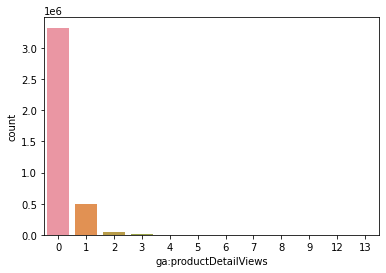

In [51]:
sns.countplot(data=data,x=data['ga:productDetailViews'])

<AxesSubplot:xlabel='ga:productAddsToCart_transf', ylabel='ga:productDetailViews'>

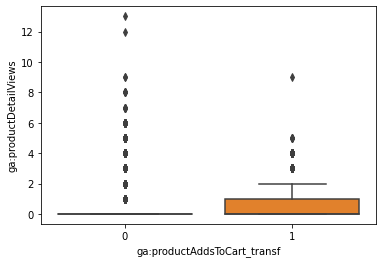

In [32]:
sns.boxplot(data=data,x=data['ga:productAddsToCart_transf'],y=data['ga:productDetailViews'])

<AxesSubplot:xlabel='ga:productAddsToCart_transf', ylabel='ga:productDetailViews'>

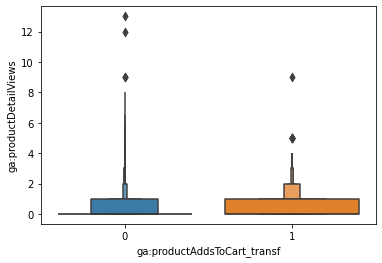

In [33]:
sns.boxenplot(data=data,x=data['ga:productAddsToCart_transf'],y=data['ga:productDetailViews'])

In [43]:
data.groupby(['ga:productListViews','ga:productDetailViews'])[['ga:productAddsToCart_transf']].mean().sort_values(by='ga:productAddsToCart_transf',ascending=False)

ga:productAddsToCart_transf
ga:productListViews ga:productDetailViews                             
0                   0                                         0.886785
                    9                                         0.333333
                    4                                         0.123412
2                   1                                         0.090909
1                   1                                         0.077320
                    3                                         0.066667
0                   2                                         0.060792
1                   2                                         0.059322
0                   5                                         0.056180
                    3                                         0.043472
                    1                                         0.032613
4                   0                                         0.003750
3                   0                                         0.002405
2                   0                                         0.002225
1                   0                                         0.001128
0                   13                                        0.000000
                    12                                        0.000000
                    8                                         0.000000
2                   2                                         0.000000
                    3                                         0.000000
0                   7                                         0.000000
                    6                                         0.000000
5                   0                                         0.000000
6                   0                                         0.000000
7                   0                                         0.000000

In [34]:
data.groupby(['ga:productDetailViews','ga:productAddsToCart_transf'])[['ga:dateHourMinute']].count().sort_values(by="ga:dateHourMinute",ascending=False).head(50)

,,ga:dateHourMinute
ga:productDetailViews,ga:productAddsToCart_transf,
0,0,3283426
1,0,475625
0,1,45343
2,0,38179
1,1,16062
3,0,7036
2,1,2470
4,0,483
3,1,320


In [39]:
detailviews_per_conversion = data.pivot_table(index=['ga:productListViews','ga:productDetailViews'],columns='ga:productAddsToCart_transf',values='ga:dateHourMinute', aggfunc='count')
detailviews_per_conversion

KeyError: '1'

<AxesSubplot:xlabel='ga:productAddsToCart_transf', ylabel='ga:productDetailViews'>

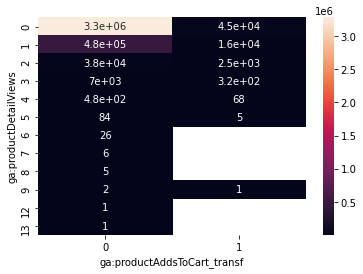

In [37]:
sns.heatmap(detailviews_per_conversion,annot=True)

In [44]:
list_detail_combi = data.pivot_table(index='ga:productListViews',columns='ga:productDetailViews',values='ga:productAddsToCart_transf')
list_detail_combi

ga:productDetailViews,0,1,2,3,4,5,6,7,8,9,12,13
ga:productListViews,,,,,,,,,,,,
0,0.886785,0.032613,0.060792,0.043472,0.123412,0.05618,0.0,0.0,0.0,0.333333,0.0,0.0
1,0.001128,0.077320,0.059322,0.066667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.002225,0.090909,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.002405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.003750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='ga:productDetailViews', ylabel='ga:productListViews'>

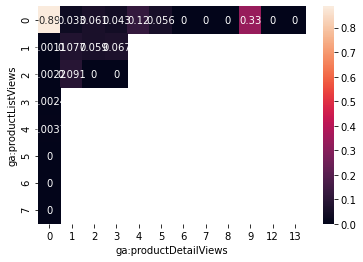

In [30]:
sns.heatmap(list_detail_combi,annot=True)

In [40]:
data[data['ga:productListViews']>2].shape

(8430, 12)

In [39]:
productListViews_higher_1 = data[data['ga:productListViews']>1]
print(productListViews_higher_1.shape)
productListViews_higher_1.head(50)

(127995, 12)


,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf
3,1002,/parafarmacia/es/147-champus,202001161511,14,1,0,google / cpc,2,0,0,0,0
1392,1090,/parafarmacia/es/147-champus,202001161511,14,1,0,google / cpc,2,0,0,0,0
1399,1100,/parafarmacia/es/147-champus,202001161511,14,1,0,google / cpc,2,0,0,0,0
1764,1129,/parafarmacia/es/147-champus,202001161511,14,1,0,google / cpc,2,0,0,0,0
3467,1175,/parafarmacia/es/busqueda?orderby=position&ord...,202001171125,12,2,4,IGShopping / Social,2,0,0,0,0
3667,1177,/parafarmacia/es/busqueda?orderby=position&ord...,202001171125,12,2,4,IGShopping / Social,2,0,0,0,0
3775,1178,/parafarmacia/es/busqueda?orderby=position&ord...,202001171125,12,2,4,IGShopping / Social,2,0,0,0,0
5962,1306,/parafarmacia/es/147-champus?page=2,202001161515,14,1,0,google / cpc,2,0,0,0,0
6245,1309,/parafarmacia/es/147-champus,202001161511,14,1,0,google / cpc,2,0,0,0,0
6688,1310,/parafarmacia/es/147-champus,202001161511,14,1,0,google / cpc,2,0,0,0,0


In [30]:
productListViews_higher_1.groupby(['ga:productSKU','ga:pagePath','ga:productListViews'])[['ga:dateHourMinute']].count().sort_values(by="ga:dateHourMinute",ascending=False).head(50)

,,,ga:dateHourMinute
ga:productSKU,ga:pagePath,ga:productListViews,
1113,/parafarmacia/es/,2,1828
1127,/parafarmacia/es/,2,1828
1049,/parafarmacia/es/,2,1807
1155,/parafarmacia/es/,2,1760
1159,/parafarmacia/es/,2,1344
1008,/parafarmacia/es/,2,1191
1021,/parafarmacia/es/,2,1191
1020,/parafarmacia/es/,2,1191
1045,/parafarmacia/es/,2,1131


In [31]:
print(productListViews_higher_1.shape)
productListViews_higher_1["ga:pagePath"].nunique()

(127995, 12)


1938

In [32]:
print(productListViews_higher_1.shape)
productListViews_higher_1["ga:productSKU"].nunique()

(127995, 12)


5002

In [33]:
print(productListViews_higher_1.shape)
productListViews_higher_1["ga:sourceMedium"].value_counts()

(127995, 12)


google / organic                                 55279
(direct) / (none)                                31957
sendinblue / email                                9346
google / cpc                                      8098
instagram.com / referral                          7138
l.instagram.com / referral                        5524
facebook / cpc                                    2046
m.facebook.com / referral                         1225
linktr.ee / referral                              1211
cantabrialabs.es / referral                        807
btodigital.lpages.co / referral                    784
IGShopping / Social                                779
bing / organic                                     525
l.facebook.com / referral                          509
youtube.com / referral                             409
Facebook tráfico / CPC                             398
vogue.es / referral                                394
facebook.com / referral                            299
yahoo / or

In [34]:
print(productListViews_higher_1.shape)
productListViews_higher_1["ga:productListClicks"].value_counts()

(127995, 12)


0    124362
1      3533
2        96
3         3
4         1
Name: ga:productListClicks, dtype: int64

In [35]:
print(productListViews_higher_1.shape)
productListViews_higher_1["ga:productDetailViews"].value_counts()

(127995, 12)


0    127965
2        16
1        11
3         3
Name: ga:productDetailViews, dtype: int64

In [65]:
data.groupby(['ga:productListViews','ga:productAddsToCart_transf'])[['ga:dateHourMinute']].count().sort_values(by=["ga:productAddsToCart_transf","ga:dateHourMinute"],ascending=False).head(20)

,,ga:dateHourMinute
ga:productListViews,ga:productAddsToCart_transf,
0,1,60370
1,1,3611
2,1,267
3,1,18
4,1,3
1,0,3151112
0,0,526055
2,0,119298
3,0,7467


In [63]:
data.groupby(['ga:productSKU','ga:productAddsToCart_transf'])[['ga:dateHourMinute']].count().sort_values(by=["ga:productAddsToCart_transf","ga:dateHourMinute"],ascending=False).head(20)

,,ga:dateHourMinute
ga:productSKU,ga:productAddsToCart_transf,
1391,1,2216
6339,1,2031
4393,1,1515
6285,1,1482
6751,1,1151
7143,1,1116
6337,1,957
1306,1,857
6539,1,820
